In [1]:
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats
from PIL import Image

# Data Visualization

## Preprocessing

In [2]:
# Download the csv file
london_crime=pd.read_csv('london_crime_by_lsoa.csv')
london_crime.head(5)

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6

In [3]:
pd.set_option('display.precision',2) #untuk menampilkan angka seluruhnya dalam 2 desimal
london_crime.shape

(13490604, 7)

In [4]:
london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [5]:
london_crime.describe()

value      year     month
count  1.35e+07  1.35e+07  1.35e+07
mean   4.78e-01  2.01e+03  6.50e+00
std    1.77e+00  2.58e+00  3.45e+00
min    0.00e+00  2.01e+03  1.00e+00
25%    0.00e+00  2.01e+03  3.75e+00
50%    0.00e+00  2.01e+03  6.50e+00
75%    1.00e+00  2.01e+03  9.25e+00
max    3.09e+02  2.02e+03  1.20e+01

In [6]:
london_crime.isnull().sum()

#no null data

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [7]:
london_crime['lsoa_code'].value_counts()
#lsoa_code bukan merupakan id yang dapat membedakan setiap baris data

E01001010    3456
E01004735    3456
E01003689    3456
E01003783    3456
E01001043    3456
             ... 
E01001101    1836
E01032775    1728
E01000001    1728
E01000002    1080
E01000003     648
Name: lsoa_code, Length: 4835, dtype: int64

In [8]:
london_crime['year'].unique()

array([2016, 2015, 2008, 2012, 2010, 2013, 2014, 2011, 2009], dtype=int64)

In [9]:
years=list(map(str,range(2008,2016)))
years

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

In [10]:
london_crime['borough'].value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

In [11]:
london_crime[['major_category','minor_category']].value_counts()

major_category               minor_category                        
Violence Against the Person  Common Assault                            522180
Theft and Handling           Theft From Motor Vehicle                  522180
                             Other Theft                               522180
Burglary                     Burglary in Other Buildings               522072
Violence Against the Person  Harassment                                522072
Theft and Handling           Theft/Taking Of Motor Vehicle             522072
Criminal Damage              Criminal Damage To Motor Vehicle          521964
                             Other Criminal Damage                     521856
Violence Against the Person  Assault with Injury                       521856
Drugs                        Possession Of Drugs                       521748
Burglary                     Burglary in a Dwelling                    521532
Criminal Damage              Criminal Damage To Dwelling               521

## Area Plot


In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
print('Matplot version:',mpl.__version__)

Matplot version: 3.3.4


In [13]:
#Top 5 borough 
table = pd.pivot_table(london_crime, values='value', index=['borough'],
                    columns=['year'], aggfunc=np.sum)
table.columns=list(map(str,table.columns))
table.sort_values(by='2016',ascending=True, inplace=True)
table.tail(5)

2008   2009   2010   2011   2012   2013   2014   2015   2016
borough                                                                     
Tower Hamlets  23578  21959  23072  24712  26784  26258  25504  27493  29253
Newham         29752  28610  30728  27978  30067  27577  28005  29217  30090
Southwark      33470  30623  31320  30723  30737  31128  28912  30260  31636
Lambeth        31717  31225  31671  33224  33473  31868  31765  33164  34071
Westminster    47846  48456  48116  54243  59226  53852  47564  47395  48330

In [14]:
#data preparation
table['Total']=table.sum(axis=1)
table.sort_values('Total',ascending=False,axis=0,inplace=True)
df_top5=table.head(5)
df_top5=df_top5.iloc[:,:-1]
df_top5=df_top5.transpose()
df_top5

borough  Westminster  Lambeth  Southwark  Camden  Newham
2008           47846    31717      33470   32010   29752
2009           48456    31225      30623   31612   28610
2010           48116    31671      31320   31804   30728
2011           54243    33224      30723   33956   27978
2012           59226    33473      30737   31472   30067
2013           53852    31868      31128   28435   27577
2014           47564    31765      28912   27198   28005
2015           47395    33164      30260   29477   29217
2016           48330    34071      31636   29183   30090

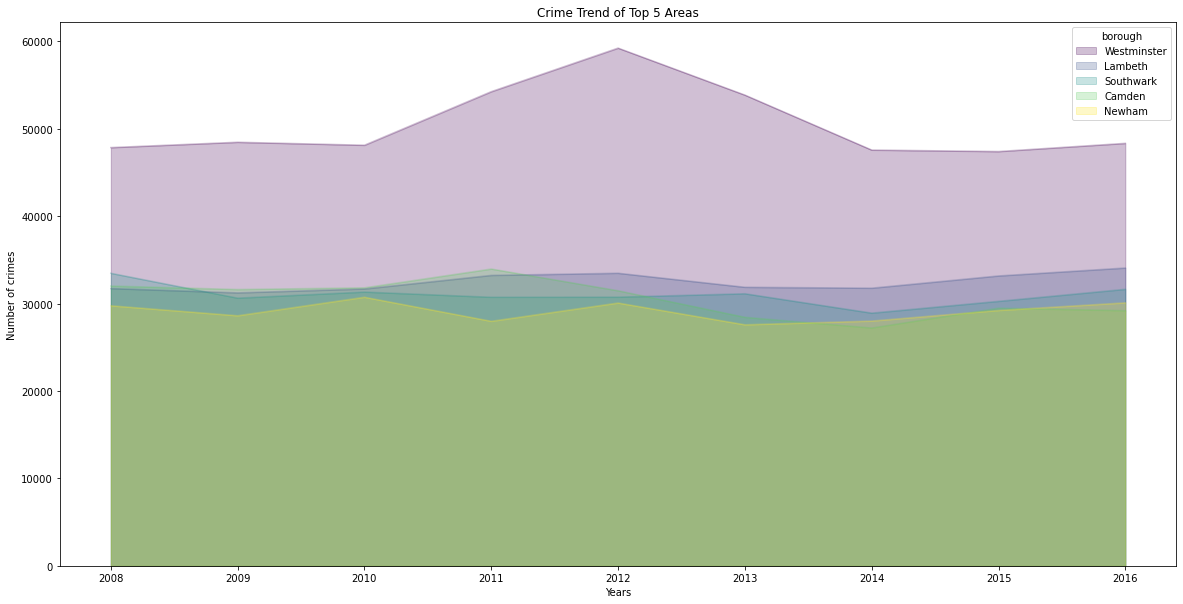

In [15]:
#create area plot

#df_top5.index=df_top5.index.map(int)
df_top5.plot(kind='area',
             alpha=0.25, #transparency, default 0.5
             stacked=False, 
             figsize=(20,10),
             cmap='viridis')
plt.title('Crime Trend of Top 5 Areas')
plt.ylabel('Number of crimes')
plt.xlabel('Years')

plt.show()

## Perbandingan kasus tahunan di 5 borough dengan kasus tertinggi
5 Daerah dengan kejadian kriminal terbanyak diurutkan dari yang terbesar adalah: Westminster, Lambeth, Soutwark,Camden, dan Newham. Westminster memiliki +/- 15.000 kasus lebih tinggi dibanding 4 borough lainnya yang memiliki rata-rata kasus tahunan di kisaran 30.000 kasus. 


## Histogram

In [16]:
# Histogram

grp_df = london_crime.groupby(['borough']).agg({'major_category': ['nunique'],
                                      'value': ['sum']})
grp_df

major_category   value
                              nunique     sum
borough                                      
Barking and Dagenham                9  149447
Barnet                              9  212191
Bexley                              9  114136
Brent                               9  227551
Bromley                             9  184349
Camden                              9  275147
City of London                      7     780
Croydon                             9  260294
Ealing                              9  251562
Enfield                             9  193880
Greenwich                           9  181568
Hackney                             9  217119
Hammersmith and Fulham              9  185259
Haringey                            9  213272
Harrow                              9  116848
Havering                            9  138947
Hillingdon                          9  209680
Hounslow                            9  186772
Islington                           9  230286
Kensington and Chelsea              9  171981
Kingston upon Thames                9   89306
Lambeth                             9  292178
Lewisham                            9  215137
Merton                              9  115654
Newham                              9  262024
Redbridge                           9  183562
Richmond upon Thames                9   96771
Southwark                           9  278809
Sutton                              9  100987
Tower Hamlets                       9  228613
Waltham Forest                      9  203879
Wandsworth                          9  204741
Westminster                         9  455028

seluruh area memiliki kasus di seluruh kategori

In [17]:

df_ave=london_crime.groupby(['borough','year'])['value'].agg([sum])
df_ave=df_ave.groupby(['borough'])['sum'].agg(['mean']) #rata-rata kasus tahunan
df_ave.round(2)

mean
borough                         
Barking and Dagenham    16605.22
Barnet                  23576.78
Bexley                  12681.78
Brent                   25283.44
Bromley                 20483.22
Camden                  30571.89
City of London             86.67
Croydon                 28921.56
Ealing                  27951.33
Enfield                 21542.22
Greenwich               20174.22
Hackney                 24124.33
Hammersmith and Fulham  20584.33
Haringey                23696.89
Harrow                  12983.11
Havering                15438.56
Hillingdon              23297.78
Hounslow                20752.44
Islington               25587.33
Kensington and Chelsea  19109.00
Kingston upon Thames     9922.89
Lambeth                 32464.22
Lewisham                23904.11
Merton                  12850.44
Newham                  29113.78
Redbridge               20395.78
Richmond upon Thames    10752.33
Southwark               30978.78
Sutton                  11220.78
Tower Hamlets           25401.44
Waltham Forest          22653.22
Wandsworth              22749.00
Westminster             50558.67

In [18]:
count, bin_edges=np.histogram(df_ave.round(0))
print(count) #frequency count
print(bin_edges) #bin ranges

[ 1  1  5  4 13  5  3  0  0  1]
[   87.   5134.2 10181.4 15228.6 20275.8 25323.  30370.2 35417.4 40464.6
 45511.8 50559. ]


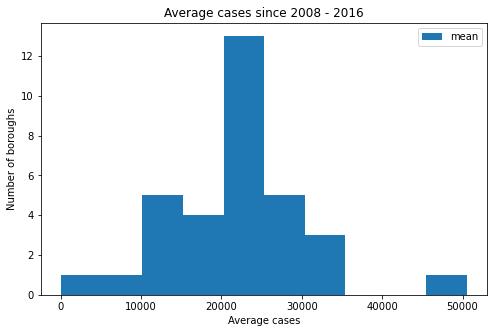

In [19]:
df_ave.plot(kind='hist',figsize=(8,5))

plt.title('Average cases since 2008 - 2016')
plt.xlabel('Average cases')
plt.ylabel('Number of boroughs')

plt.show()

Kisaran kasus di tiap borough  adalah 10.000 sd 35.000 kasus, dengan sebagian besar borough memiliki 20.000 sd 25.000 kasus.

In [20]:
table['2016']


borough
Westminster               48330
Lambeth                   34071
Southwark                 31636
Camden                    29183
Newham                    30090
Croydon                   28712
Ealing                    27127
Islington                 27092
Tower Hamlets             29253
Brent                     26693
Hackney                   28265
Lewisham                  23904
Haringey                  27174
Barnet                    24684
Hillingdon                24341
Wandsworth                23679
Waltham Forest            20716
Enfield                   22485
Hounslow                  22251
Hammersmith and Fulham    20174
Bromley                   20164
Redbridge                 19502
Greenwich                 22730
Kensington and Chelsea    19580
Barking and Dagenham      16741
Havering                  16903
Harrow                    13153
Merton                    12755
Bexley                    12840
Sutton                    10658
Richmond upon Thames      11074


In [21]:
count, bin_edges=np.histogram(table['2016'])
print(count) #frequency count
print(bin_edges) #bin ranges


[ 1  0  6  2 10  8  4  1  0  1]
[  178.   4993.2  9808.4 14623.6 19438.8 24254.  29069.2 33884.4 38699.6
 43514.8 48330. ]


In [22]:
table

2008   2009   2010   2011   2012   2013   2014  \
borough                                                                   
Westminster             47846  48456  48116  54243  59226  53852  47564   
Lambeth                 31717  31225  31671  33224  33473  31868  31765   
Southwark               33470  30623  31320  30723  30737  31128  28912   
Camden                  32010  31612  31804  33956  31472  28435  27198   
Newham                  29752  28610  30728  27978  30067  27577  28005   
Croydon                 29516  29784  29373  29830  30189  27444  27357   
Ealing                  28947  28617  31360  29537  28832  25917  24978   
Islington               26273  25485  24693  24980  26268  23784  24679   
Tower Hamlets           23578  21959  23072  24712  26784  26258  25504   
Brent                   23504  24748  25512  27669  26357  23759  24426   
Hackney                 22004  20718  20175  21395  27095  25633  24893   
Lewisham                27054  25182  24532  24201  23652  22074  21101   
Haringey                25724  23704  22156  23179  23231  20705  22773   
Barnet                  23944  23449  23416  24007  23573  22510  22572   
Hillingdon              24318  24605  23421  24282  22103  20248  23128   
Wandsworth              23330  23021  22815  21384  24457  22290  21364   
Waltham Forest          24080  24761  24818  23714  22647  21903  20271   
Enfield                 21980  21147  20808  21041  21069  21574  21700   
Hounslow                20204  19783  19665  21105  22724  19749  20005   
Hammersmith and Fulham  21114  21211  21941  22151  21030  18605  19185   
Bromley                 24015  21858  19572  19868  19622  18945  19668   
Redbridge               20873  20837  20652  21994  21424  19793  19590   
Greenwich               22010  19851  18626  18552  20028  18948  19894   
Kensington and Chelsea  20663  18742  19481  19146  19757  17702  17840   
Barking and Dagenham    17656  17713  17130  16686  15990  15759  15426   
Havering                15395  14538  14957  15496  15965  15089  14734   
Harrow                  13774  13948  13945  12801  12803  11914  11909   
Merton                  13875  13561  13595  13548  12856  11595  11596   
Bexley                  15305  14445  13166  11325  11669  11552  11844   
Sutton                  12943  12240  12032  11068  10948  10057  10443   
Richmond upon Thames    11106  10618  10601  10896  11168  10439  10456   
Kingston upon Thames    10661  10163  10171  10155   9956   9191   9288   
City of London              0      0      0     69    157    110    115   

                         2015   2016   Total  
borough                                       
Westminster             47395  48330  455028  
Lambeth                 33164  34071  292178  
Southwark               30260  31636  278809  
Camden                  29477  29183  275147  
Newham                  29217  30090  262024  
Croydon                 28089  28712  260294  
Ealing                  26247  27127  251562  
Islington               27032  27092  230286  
Tower Hamlets           27493  29253  228613  
Brent                   24883  26693  227551  
Hackney                 26941  28265  217119  
Lewisham                23437  23904  215137  
Haringey                24626  27174  213272  
Barnet                  24036  24684  212191  
Hillingdon              23234  24341  209680  
Wandsworth              22401  23679  204741  
Waltham Forest          20969  20716  203879  
Enfield                 22076  22485  193880  
Hounslow                21286  22251  186772  
Hammersmith and Fulham  19848  20174  185259  
Bromley                 20637  20164  184349  
Redbridge               18897  19502  183562  
Greenwich               20929  22730  181568  
Kensington and Chelsea  19070  19580  171981  
Barking and Dagenham    16346  16741  149447  
Havering                15870  16903  138947  
Harrow                  12601  13153  116848  
Merton                  12273  12755

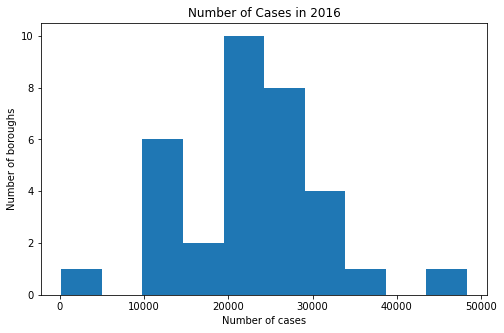

Borough with lowest cases: City of London
Borough with highest cases: Westminster


In [23]:

table['2016'].plot(kind='hist',figsize=(8,5))

plt.title('Number of Cases in 2016')
plt.xlabel('Number of cases')
plt.ylabel('Number of boroughs')

plt.show()

print('Borough with lowest cases:',table['2016'].idxmin())
print('Borough with highest cases:',table['2016'].idxmax())

## Sebaran kasus di tiap borough tahun 2016
Kisaran kasus di tiap borough adalah 10.000 sd 35.000 kasus, dengan sebagian besar borough memiliki 20.000 sd 25.000 kasus. Tren ini mendekati rata-rata jumlah kasus tahunan sejak 2008 sd 2016.


# Bar Chart

In [24]:
london_crime.head()

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6

In [25]:
table.head()

2008   2009   2010   2011   2012   2013   2014   2015   2016  \
borough                                                                      
Westminster  47846  48456  48116  54243  59226  53852  47564  47395  48330   
Lambeth      31717  31225  31671  33224  33473  31868  31765  33164  34071   
Southwark    33470  30623  31320  30723  30737  31128  28912  30260  31636   
Camden       32010  31612  31804  33956  31472  28435  27198  29477  29183   
Newham       29752  28610  30728  27978  30067  27577  28005  29217  30090   

              Total  
borough              
Westminster  455028  
Lambeth      292178  
Southwark    278809  
Camden       275147  
Newham       262024

In [26]:
#gunakan tabel yang telah dibuat sebelumnya, ambil 15 terbesar pada 2016
table.sort_values(by='2016',ascending=True, inplace=True)
top15=table['2016'].tail(15)

In [27]:
top15.sum()/table['2016'].sum()  #hitung proporsi dari 15 borough dengan case terbanyak

0.5984817713392228

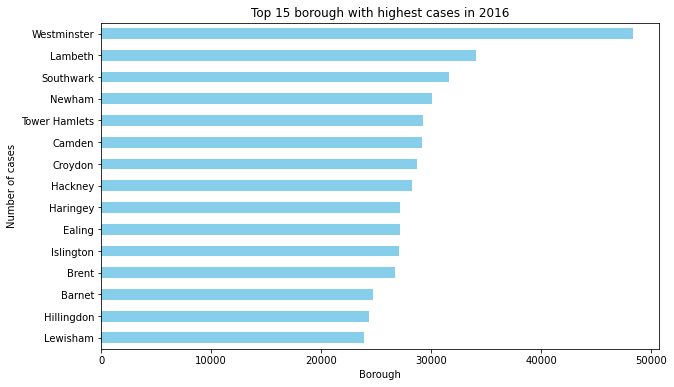

In [28]:
top15.plot(kind='barh', figsize=(10,6), color='skyblue')

plt.title('Top 15 borough with highest cases in 2016')
plt.ylabel('Number of cases')
plt.xlabel('Borough')

plt.show()

## Perbandingan jumlah kasus pada 15 borough dengan kasus tertinggi
In 2016, number of cases in 15 borough with highest case, has share of 59,85% of total cases in London. Westminster has the highest cases with almost 15.000 more casesthan Lambeth which become the second highest cases. While other boroughs have cases around 24.000 - 35.000 cases.

# Pie Chart

In [29]:
#sum cases by category per year 
table = pd.pivot_table(london_crime, values='value', index=['major_category'],
                    columns=['year'], aggfunc=np.sum)
table.columns=list(map(str,table.columns))
table.sort_values(by='2016',ascending=True, inplace=True)
table



2008    2009    2010    2011    2012    2013  \
major_category                                                                
Fraud or Forgery               5325       0       0       0       0       0   
Sexual Offences                1273       0       0       0       0       0   
Other Notifiable Offences     10112   10644   10768   10264   10675   10811   
Robbery                       29627   29568   32341   36679   35260   29337   
Drugs                         68804   60549   58674   57550   51776   50278   
Criminal Damage               91872   85565   77897   70914   62158   56206   
Burglary                      88092   90619   86826   93315   93392   87222   
Violence Against the Person  159844  160777  157894  146901  150014  146181   
Theft and Handling           283692  279492  290924  309292  334054  306372   

                               2014    2015    2016  
major_category                                       
Fraud or Forgery                  0       0       0  
Sexual Offences                   0       0       0  
Other Notifiable Offences     13037   14229   15809  
Robbery                       22150   21383   22528  
Drugs                         44435   39785   38914  
Criminal Damage               59279   62976   64071  
Burglary                      76053   70489   68285  
Violence Against the Person  185349  218740  232381  
Theft and Handling           279880  284022  294133

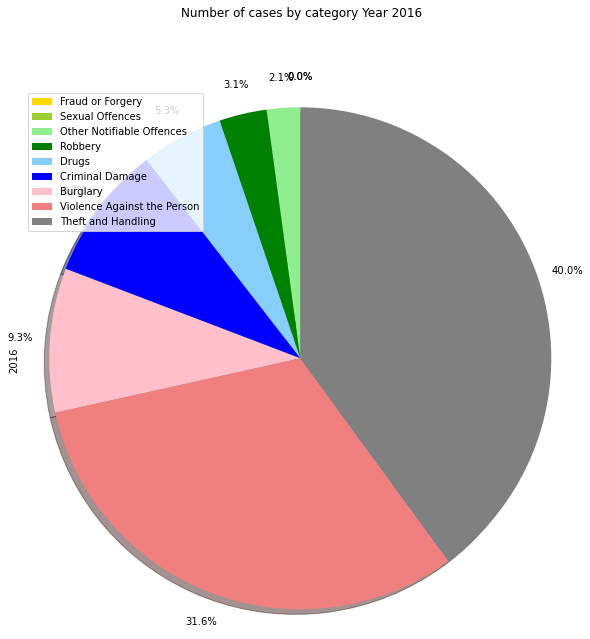

In [30]:
#buat chart
colors_list=['gold','yellowgreen','lightgreen','green','lightskyblue','blue',
             'pink','lightcoral','grey']
table['2016'].plot(kind='pie',
                   figsize=(10,10),
                   autopct='%1.1f%%',
                   startangle=90,
                   shadow=True,
                   labels=None,
                   pctdistance=1.12,
                   colors=colors_list,
                   
                  )
#scale the title up by 12% to match pctdistance
plt.title('Number of cases by category Year 2016',y=1.12)
plt.axis('equal')

#add legend
plt.legend(labels=table.index,loc='upper left')

plt.show()

## Persentase Kasus pada 2016
In 2016, no case found in category 'Fraud or Forgery' & 'Sexual Offences'. There are 2 category that have shares of 71,6% of total cases ('Theft and Handling' & 'Violence against the Person')

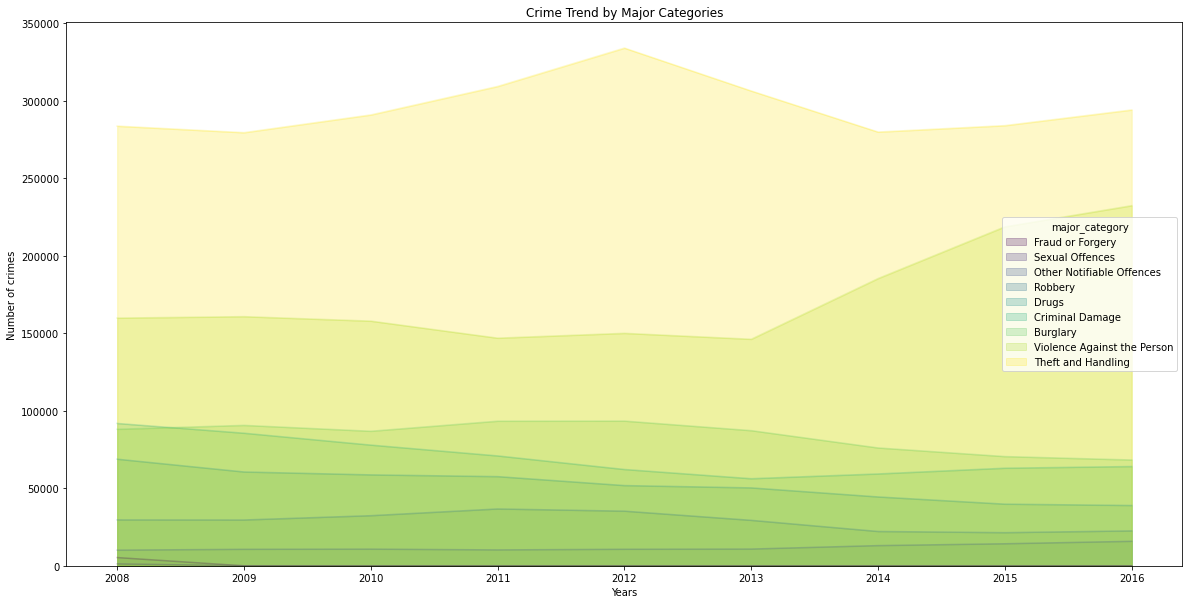

In [31]:
#df_top5.index=df_top5.index.map(int)
crime_trend=table.transpose()
crime_trend.plot(kind='area',
             alpha=0.25, #transparency, default 0.5
             stacked=False, 
             figsize=(20,10),
             cmap='viridis')
plt.title('Crime Trend by Major Categories')
plt.ylabel('Number of crimes')
plt.xlabel('Years')

plt.show()

## Tren pertumbuhan kasus dari tahun ke tahun
Number of cases of 'Theft and Handling' category has fluctuated over the years. But, we should aware that there is significant increment of 'Violence against the Person' 

# Box Plot

In [32]:
london_crime['borough'].nunique() #cek jumlah borough

33

In [33]:
london_crime.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

In [34]:
#pivot untuk mendapatkan jumlah kasus 'Violence Against the Person' tahunan di tiap borough
table = pd.pivot_table(london_crime[london_crime.major_category=='Violence Against the Person'], values='value', index=['borough'],
                    columns=['year'], aggfunc=np.sum)
table.columns=list(map(str,table.columns))

In [35]:
table.head()

2008  2009  2010  2011  2012  2013  2014  2015  2016
borough                                                                   
Barking and Dagenham  4995  5074  4545  3934  3734  3889  4965  5888  6067
Barnet                4836  4730  4435  4127  3942  4292  5799  6905  7499
Bexley                3271  3614  3180  2726  2744  2714  3346  3939  4503
Brent                 5690  6386  6525  6804  6395  5997  7691  8485  9205
Bromley               5231  5214  4674  4520  4143  4207  5512  6608  6650

In [36]:
table.shape

(33, 9)

In [37]:
table.describe()

2008     2009     2010     2011     2012     2013     2014  \
count    33.00    33.00    33.00    33.00    33.00    33.00    33.00   
mean   4843.76  4872.03  4784.67  4451.55  4545.88  4429.73  5616.64   
std    1845.16  1802.89  1809.59  1730.06  1706.23  1649.02  2075.95   
min       0.00     0.00     0.00    14.00    15.00    14.00    18.00   
25%    3570.00  3614.00  3499.00  3150.00  3303.00  3264.00  3965.00   
50%    5104.00  5074.00  4732.00  4555.00  4727.00  4516.00  5965.00   
75%    5899.00  5864.00  5919.00  5556.00  5868.00  5941.00  7116.00   
max    7993.00  7870.00  8097.00  7432.00  7130.00  6887.00  8953.00   

           2015      2016  
count     33.00     33.00  
mean    6628.48   7041.85  
std     2385.07   2513.60  
min       28.00     25.00  
25%     5033.00   5936.00  
50%     6924.00   7409.00  
75%     8441.00   8832.00  
max    10491.00  10834.00

In [38]:
otl=table['2016'].quantile(0.25)-1.5*table['2016'].std()  #batasan outlier berdasarkan data 2016
otl

2165.5976733847806

In [39]:
print("Rata-rata kasus terendah:"+ table.describe().mean().idxmin()+" (" +str(round(table.describe().mean().min(),0))+" kasus)")
print("Rata-rata kasus tertinggi:"+ table.describe().mean().idxmax()+" (" +str(round(table.describe().mean().max(),0))+" kasus)")

Rata-rata kasus terendah:2013 (3342.0 kasus)
Rata-rata kasus tertinggi:2016 (5328.0 kasus)


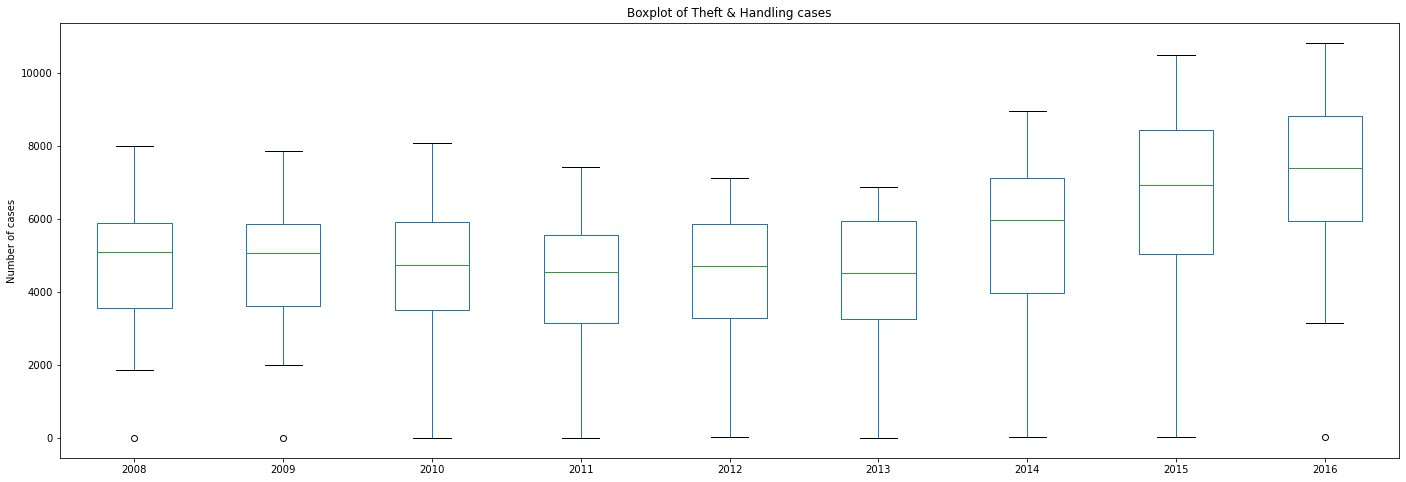

In [40]:
table.plot(kind='box',figsize=(24,8))
plt.title('Boxplot of Theft & Handling cases')
plt.ylabel('Number of cases')

plt.show()

In [41]:
table[table['2016']<2165.59] #cek outlier

2008  2009  2010  2011  2012  2013  2014  2015  2016
borough                                                             
City of London     0     0     0    14    15    14    18    28    25

Average cases 'Violence Against the Person' has increased since 2014. City of London has the lowest cases and can be called as outlier, but still showing increment trend.

# Scatter Plot

In [42]:
#add date
df=london_crime
from pandas.tseries.offsets import MonthEnd
df["yearmonth"] = df["year"].astype(str) + df["month"].astype(str)
df['EndOfMonth'] = pd.to_datetime(df['yearmonth'], format="%Y%m") + MonthEnd(1)
df

lsoa_code     borough               major_category  \
0         E01001116     Croydon                     Burglary   
1         E01001646   Greenwich  Violence Against the Person   
2         E01000677     Bromley  Violence Against the Person   
3         E01003774   Redbridge                     Burglary   
4         E01004563  Wandsworth                      Robbery   
...             ...         ...                          ...   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month yearmonth EndOfMonth  
0         Burglary in Other Buildings      0  2016     11    201611 2016-11-30  
1                      Other violence      0  2016     11    201611 2016-11-30  
2                      Other violence      0  2015      5     20155 2015-05-31  
3         Burglary in Other Buildings      0  2016      3     20163 2016-03-31  
4                   Personal Property      0  2008      6     20086 2008-06-30  
...                               ...    ...   ...    ...       ...        ...  
13490599  Criminal Damage To Dwelling      0  2015      2     20152 2015-02-28  
13490600            Personal Property      1  2015      6     20156 2015-06-30  
13490601       Burglary in a Dwelling      0  2011      2     20112 2011-02-28  
13490602            Business Property      0  2011      5     20115 2011-05-31  
13490603                 Wounding/GBH      0  2015      6     20156 2015-06-30  

[13490604 rows x 9 columns]

In [43]:
df.sort_values(by=['year','month'],ascending=True, inplace=True)
df['period']=12*(df['year']-2008)+df['month'] #set jan2008 to 1 and increment 1 for every month ahead
df['mperiod']=df['year']*100+df['month']
df

lsoa_code                 borough               major_category  \
33        E01032741                Havering  Violence Against the Person   
60        E01002678                Hounslow    Other Notifiable Offences   
79        E01004165                  Sutton                      Robbery   
102       E01003225                Lewisham    Other Notifiable Offences   
129       E01001889  Hammersmith and Fulham              Criminal Damage   
...             ...                     ...                          ...   
13489719  E01033594             Westminster           Theft and Handling   
13489779  E01002398              Hillingdon              Criminal Damage   
13490014  E01003168                 Lambeth              Criminal Damage   
13490292  E01002735               Islington           Theft and Handling   
13490579  E01004100                  Sutton                        Drugs   

                            minor_category  value  year  month yearmonth  \
33                              Harassment      0  2008      1     20081   
60                          Going Equipped      0  2008      1     20081   
79                       Personal Property      1  2008      1     20081   
102                         Going Equipped      0  2008      1     20081   
129            Criminal Damage To Dwelling      0  2008      1     20081   
...                                    ...    ...   ...    ...       ...   
13489719     Theft/Taking Of Motor Vehicle      2  2016     12    201612   
13489779             Other Criminal Damage      1  2016     12    201612   
13490014  Criminal Damage To Motor Vehicle      0  2016     12    201612   
13490292             Handling Stolen Goods      0  2016     12    201612   
13490579                  Drug Trafficking      0  2016     12    201612   

         EndOfMonth  period  mperiod  
33       2008-01-31       1   200801  
60       2008-01-31       1   200801  
79       2008-01-31       1   200801  
102      2008-01-31       1   200801  
129      2008-01-31       1   200801  
...             ...     ...      ...  
13489719 2016-12-31     108   201612  
13489779 2016-12-31     108   201612  
13490014 2016-12-31     108   201612  
13490292 2016-12-31     108   201612  
13490579 2016-12-31     108   201612  

[13490604 rows x 11 columns]

In [44]:
df_can=pd.DataFrame(df[
    (df['major_category']=='Violence Against the Person')
].groupby(['period','mperiod'])['value'].sum()) 
df_can.head()

value
period mperiod       
1      200801   12719
2      200802   12123
3      200803   13244
4      200804   12590
5      200805   14577

In [45]:
df_can.reset_index(level=0,inplace=True) #mengubah sluruh index menjadi kolom
df_can.info() #untuk mengetahui tipe data tiap kolom

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 200801 to 201612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   period  108 non-null    int64
 1   value   108 non-null    int64
dtypes: int64(2)
memory usage: 2.5 KB


In [46]:
df_can.head()

period  value
mperiod               
200801        1  12719
200802        2  12123
200803        3  13244
200804        4  12590
200805        5  14577

In [47]:
#Buat Scatter Plot

#install seaborn
!pip install seaborn

#import library
import seaborn as sns

print ('Seaborn installed and imported!')

Seaborn installed and imported!


Text(0.5, 1.0, 'Trends - Violence Against the Person in London since 2008 - 2016')

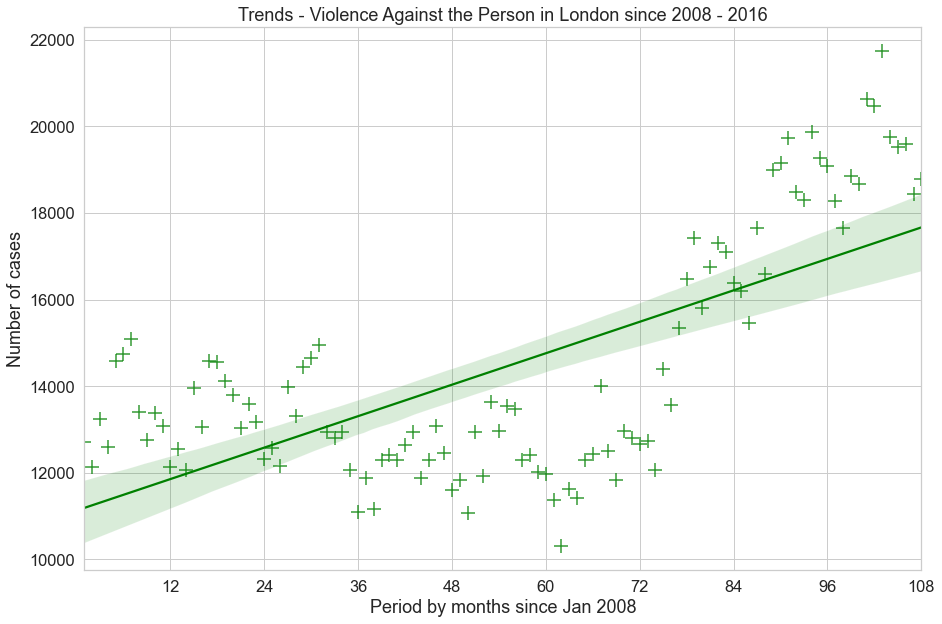

In [48]:
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax=sns.regplot(
    x='period',
    y='value',
    color='green',
    marker='+',  #bentuk marker
    scatter_kws={'s':200}, #ukuran marker
    data=df_can)
ax.xaxis.set_major_locator(MultipleLocator(12))
ax.set(xlabel='Period by months since Jan 2008',ylabel='Number of cases')
ax.set_title('Trends - Violence Against the Person in London since 2008 - 2016')

Number of Violence Against the Person cases has decreased until 2014 (months 72) but the trend of cases increased after that.

# Word Cloud

In [49]:
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
print('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


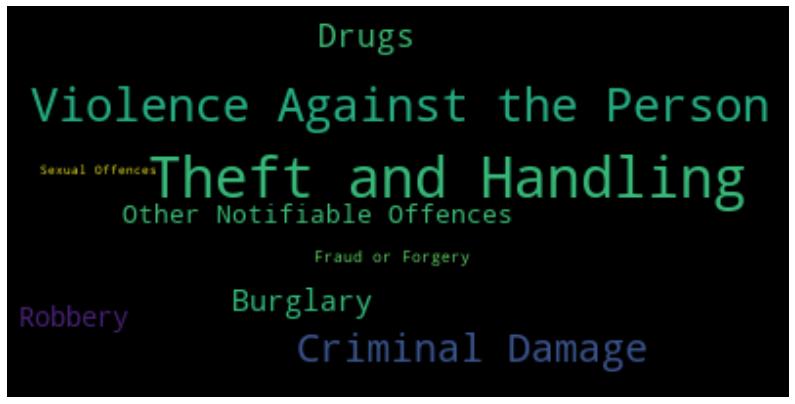

In [50]:
stopwords=set(STOPWORDS)

#stopwords.add('Name')
#stopwords.add('dtype')
#stopwords.add('minor_category')
#stopwords.add('major_category')
#stopwords.add('object')
#stopwords.add('Name')


major_crime=WordCloud(
    background_color='white',
    max_words=200000,
    stopwords=stopwords
)

#ambil string sebagai satu kesatuan
data = london_crime['major_category'].value_counts().to_dict()
#generate the data
major_crime = WordCloud().generate_from_frequencies(data) 

#display wordcloud
fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(major_crime,interpolation='bilinear')
plt.axis('off')
plt.show()

3 major categories with highest cases: Theft and Handling, Violence against the Person, Criminal Damage.

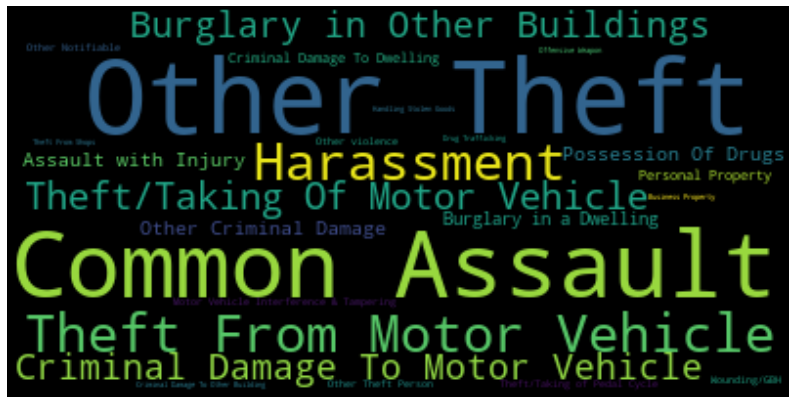

In [51]:
stopwords=set(STOPWORDS)

#stopwords.add('Name')
#stopwords.add('dtype')
#stopwords.add('minor_category')
#stopwords.add('major_category')
#stopwords.add('object')
#stopwords.add('Name')


major_crime=WordCloud(
    background_color='white',
    max_words=200000,
    stopwords=stopwords
)

#ambil string sebagai satu kesatuan
data = london_crime['minor_category'].value_counts().to_dict()
#generate the data
major_crime = WordCloud().generate_from_frequencies(data) 

#display wordcloud
fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(major_crime,interpolation='bilinear')
plt.axis('off')
plt.show()


Kasus terbanyak yang terjadi dicatat sebagai kategori minor: Other theft, Common assault, dan Theft from motor vehicle  

# Folium Maps

In [52]:
!pip install folium
import folium
print ('Folium installed and imported!')

import json   #untuk menggunakan json yang berisi koordinat wilayah


Folium installed and imported!


Area dengan kasus 'Violence against the Person' terendah pada City of London. Namun demikian, kasus yang sangat tinggi berada di sekitar area London. Sedangkan pada perbatasan London dengan daerah lainnya menunjukkan jumlah kasus yang lebih rendah.

In [53]:
#data tingkat kriminalitas 2015 secara total

df_can=pd.DataFrame(london_crime[
   # (london_crime['major_category']=='Violence Against the Person')&
    (london_crime['year']==2016)
].groupby(['borough'])['value'].sum()) 
df_can.sort_values(by='value',ascending=True, inplace=True)


#Define latitude & longitude for London
latitude=51.507359
longitude=-0.136439



#pengaturan world map
london_geo = r'london_borough.geojson'
world_map = folium.Map(location=[latitude,longitude], zoom_start=9)
folium.Choropleth(geo_data=london_geo,
                 data=df_can,
                 columns=[df_can.index, 'value'],
                 key_on='feature.properties.name',
                 #fill_color='YlOrRd',
                 #colorscale='Reds',
                 fill_opacity=0.5,
                 line_opacity=0.7,
                 legend_name='Kriminalitas di London tahun 2016').add_to(world_map)

#display world map
world_map

## Sebaran kasus di London pada 2016
City of London sebagai daerah dengan kasus terendah, berbatasan langsung dengan Westminster yang memiliki total kasus tertinggi.

In [54]:
import json   #untuk menggunakan json yang berisi koordinat wilayah
#data tingkat kriminalitas 2015 secara total

df_can=pd.DataFrame(london_crime[
    (london_crime['major_category']=='Violence Against the Person')&
    (london_crime['year']==2016)
].groupby(['borough'])['value'].sum()) 
df_can.sort_values(by='value',ascending=True, inplace=True)
df_can.head()

#Define latitude & longitude for London
latitude=51.507359
longitude=-0.136439


#pengaturan world map
london_geo = r'london_borough.geojson'
world_map = folium.Map(location=[latitude,longitude], zoom_start=9)
folium.Choropleth(geo_data=london_geo,
                 data=df_can,
                 columns=[df_can.index, 'value'],
                 key_on='feature.properties.name',
                 #fill_color='YlOrRd',
                 #colorscale='Reds',
                 fill_opacity=0.5,
                 line_opacity=0.7,
                 legend_name='Kriminalitas di London tahun 2016').add_to(world_map)

#display world map
world_map

## Kasus 'Violence against the Person' yang meningkat sejak 2014.
Kasus terendah ditemukan  pada City of London. Namun demikian, kasus yang sangat tinggi berada di sekitar area London. Sedangkan pada perbatasan London dengan daerah lainnya menunjukkan jumlah kasus yang lebih rendah.